In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option("display.precision", 10)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)


In [2]:
df=pd.read_csv('Dataset/final_data.csv')

In [3]:
df

,State_Name,Crop_Year,Crop,Area,Avg_Temp,Avg_Rain,Production,states_id,crop_id
0,Andaman and Nicobar Islands,2000,Arecanut,1254.000,24.600,1050.400,2000.000,1,1
1,Andaman and Nicobar Islands,2000,Other Kharif pulses,2.000,24.600,1050.400,1.000,1,2
2,Andaman and Nicobar Islands,2000,Rice,102.000,24.600,1050.400,321.000,1,3
3,Andaman and Nicobar Islands,2000,Banana,176.000,24.600,1050.400,641.000,1,4
4,Andaman and Nicobar Islands,2000,Cashewnut,720.000,24.600,1050.400,165.000,1,5
...,...,...,...,...,...,...,...,...,...
240437,Sikkim,2015,Soyabean,546.000,26.130,1093.200,520.000,30,52
240438,Sikkim,2015,Urad,914.000,26.130,1093.200,811.000,30,31
240439,Sikkim,2015,Barley,12.000,26.130,1093.200,11.000,30,47
240440,Sikkim,2015,Rapeseed &Mustard,625.000,26.130,1093.200,540.000,30,41


In [4]:
df.isnull().sum()

State_Name       0
Crop_Year        0
Crop             0
Area             0
Avg_Temp         0
Avg_Rain         0
Production    3672
states_id        0
crop_id          0
dtype: int64

In [5]:
df['Production'].replace(np.nan,0, inplace=True)

In [6]:
df.isnull().sum()

State_Name    0
Crop_Year     0
Crop          0
Area          0
Avg_Temp      0
Avg_Rain      0
Production    0
states_id     0
crop_id       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240442 entries, 0 to 240441
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State_Name  240442 non-null  object 
 1   Crop_Year   240442 non-null  int64  
 2   Crop        240442 non-null  object 
 3   Area        240442 non-null  float64
 4   Avg_Temp    240442 non-null  float64
 5   Avg_Rain    240442 non-null  float64
 6   Production  240442 non-null  float64
 7   states_id   240442 non-null  int64  
 8   crop_id     240442 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 16.5+ MB


In [8]:
df['Area_10000']=df['Area']/10000


df['Prod_1000000']=df['Production']/1000000

In [9]:
df.isnull().sum()

State_Name      0
Crop_Year       0
Crop            0
Area            0
Avg_Temp        0
Avg_Rain        0
Production      0
states_id       0
crop_id         0
Area_10000      0
Prod_1000000    0
dtype: int64

In [10]:
df.describe()

,Crop_Year,Area,Avg_Temp,Avg_Rain,Production,states_id,crop_id,Area_10000,Prod_1000000
count,240442.000,240442.000,240442.000,240442.000,240442.000,240442.000,240442.000,240442.000,240442.000
mean,2005.655,11946.438,24.809,1121.037,585758.598,19.998,26.940,1.195,0.586
std,4.953,50856.175,0.255,92.857,17133603.708,10.706,17.823,5.086,17.134
min,1997.000,0.040,24.100,920.800,0.000,1.000,1.000,0.000,0.000
25%,2002.000,80.000,24.660,1071.300,75.000,12.000,15.000,0.008,0.000
50%,2006.000,565.000,24.740,1132.000,674.000,20.000,24.000,0.057,0.001
75%,2010.000,4279.750,25.060,1200.500,6589.000,31.000,36.000,0.428,0.007
max,2015.000,8580100.000,26.130,1243.500,1250800000.000,35.000,123.000,858.010,1250.800


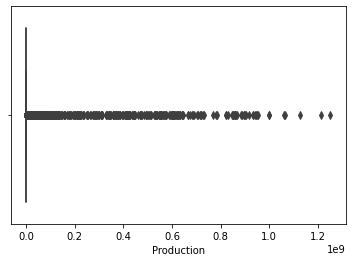

In [11]:
sns.boxplot(df['Production'])

In [12]:
# Prodcution outliers
IQR=6677.000-76.000
upper_bound=(1.5*IQR)+6677.000
lower_bound=76.000-(1.5*IQR)
print(upper_bound)
print(lower_bound)

16578.5
-9825.5


In [13]:
# Area outliers
IQR_a=4420.000-81.000
upper_bound_a=(1.5*IQR_a)+4420.000
lower_bound_a=81.000-(1.5*IQR_a)
print(upper_bound_a)
print(lower_bound_a)

10928.5
-6427.5


In [14]:
df=df[df.Production <=16578.5 ]

In [15]:
df=df[df.Production <=16578.5 ]

In [16]:
df=df[df.Area <=10928.5 ]

In [17]:
df=df[df.Production>=-6427.5]

In [18]:
df

,State_Name,Crop_Year,Crop,Area,Avg_Temp,Avg_Rain,Production,states_id,crop_id,Area_10000,Prod_1000000
0,Andaman and Nicobar Islands,2000,Arecanut,1254.000,24.600,1050.400,2000.000,1,1,0.125,0.002
1,Andaman and Nicobar Islands,2000,Other Kharif pulses,2.000,24.600,1050.400,1.000,1,2,0.000,0.000
2,Andaman and Nicobar Islands,2000,Rice,102.000,24.600,1050.400,321.000,1,3,0.010,0.000
3,Andaman and Nicobar Islands,2000,Banana,176.000,24.600,1050.400,641.000,1,4,0.018,0.001
4,Andaman and Nicobar Islands,2000,Cashewnut,720.000,24.600,1050.400,165.000,1,5,0.072,0.000
...,...,...,...,...,...,...,...,...,...,...,...
240437,Sikkim,2015,Soyabean,546.000,26.130,1093.200,520.000,30,52,0.055,0.001
240438,Sikkim,2015,Urad,914.000,26.130,1093.200,811.000,30,31,0.091,0.001
240439,Sikkim,2015,Barley,12.000,26.130,1093.200,11.000,30,47,0.001,0.000
240440,Sikkim,2015,Rapeseed &Mustard,625.000,26.130,1093.200,540.000,30,41,0.062,0.001


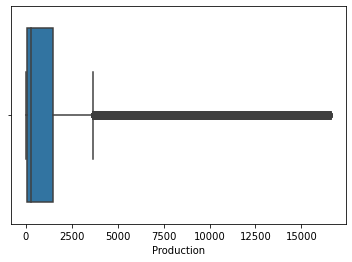

In [19]:
sns.boxplot(df['Production'])

In [20]:
df.columns

Index(['State_Name', 'Crop_Year', 'Crop', 'Area', 'Avg_Temp', 'Avg_Rain',
       'Production', 'states_id', 'crop_id', 'Area_10000', 'Prod_1000000'],
      dtype='object')

In [21]:
df['State_Name'].value_counts()

Uttar Pradesh                  26105
Madhya Pradesh                 17622
Karnataka                      16282
Bihar                          15602
Assam                          12080
                               ...  
Sikkim                           671
Dadra and Nagar Haveli           232
Andaman and Nicobar Islands      176
Goa                              126
Chandigarh                        90
Name: State_Name, Length: 32, dtype: int64

In [22]:
import category_encoders as ce

In [23]:

encoder=ce.sum_coding.SumEncoder(cols='Crop',verbose=False,)

In [24]:
encoder_state=ce.sum_coding.SumEncoder(cols='State_Name',verbose=False,)

In [25]:
df_encoded=encoder.fit_transform(df)
df_encoded_1=encoder_state.fit_transform(df_encoded)

In [26]:
df_encoded_1

,intercept,intercept,State_Name_0,State_Name_1,State_Name_2,State_Name_3,State_Name_4,State_Name_5,State_Name_6,State_Name_7,...,Crop_120,Crop_121,Area,Avg_Temp,Avg_Rain,Production,states_id,crop_id,Area_10000,Prod_1000000
0,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1254.000,24.600,1050.400,2000.000,1,1,0.125,0.002
1,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.000,24.600,1050.400,1.000,1,2,0.000,0.000
2,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,102.000,24.600,1050.400,321.000,1,3,0.010,0.000
3,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,176.000,24.600,1050.400,641.000,1,4,0.018,0.001
4,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,720.000,24.600,1050.400,165.000,1,5,0.072,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240437,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,546.000,26.130,1093.200,520.000,30,52,0.055,0.001
240438,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,914.000,26.130,1093.200,811.000,30,31,0.091,0.001
240439,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,12.000,26.130,1093.200,11.000,30,47,0.001,0.000
240440,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,625.000,26.130,1093.200,540.000,30,41,0.062,0.001


In [27]:
a=df_encoded_1.columns

In [28]:
for i in a:
    print('"{}"'.format(i),end=',')

"intercept","intercept","State_Name_0","State_Name_1","State_Name_2","State_Name_3","State_Name_4","State_Name_5","State_Name_6","State_Name_7","State_Name_8","State_Name_9","State_Name_10","State_Name_11","State_Name_12","State_Name_13","State_Name_14","State_Name_15","State_Name_16","State_Name_17","State_Name_18","State_Name_19","State_Name_20","State_Name_21","State_Name_22","State_Name_23","State_Name_24","State_Name_25","State_Name_26","State_Name_27","State_Name_28","State_Name_29","State_Name_30","Crop_Year","Crop_0","Crop_1","Crop_2","Crop_3","Crop_4","Crop_5","Crop_6","Crop_7","Crop_8","Crop_9","Crop_10","Crop_11","Crop_12","Crop_13","Crop_14","Crop_15","Crop_16","Crop_17","Crop_18","Crop_19","Crop_20","Crop_21","Crop_22","Crop_23","Crop_24","Crop_25","Crop_26","Crop_27","Crop_28","Crop_29","Crop_30","Crop_31","Crop_32","Crop_33","Crop_34","Crop_35","Crop_36","Crop_37","Crop_38","Crop_39","Crop_40","Crop_41","Crop_42","Crop_43","Crop_44","Crop_45","Crop_46","Crop_47","Crop_48

In [29]:
print('"{}"'.format(a))

"Index(['intercept', 'intercept', 'State_Name_0', 'State_Name_1',
       'State_Name_2', 'State_Name_3', 'State_Name_4', 'State_Name_5',
       'State_Name_6', 'State_Name_7',
       ...
       'Crop_120', 'Crop_121', 'Area', 'Avg_Temp', 'Avg_Rain', 'Production',
       'states_id', 'crop_id', 'Area_10000', 'Prod_1000000'],
      dtype='object', length=164)"


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()

In [32]:
df_encoded_1['Production'].min()

0.0

In [33]:
def normalize(values):
    return (values - 0.0)/(16574.0 - 0.0) 

In [34]:
df_encoded_1['Area'].min()

0.04

In [35]:
def normalize_area(values):
    return (values - 0.04)/(10927.0 - 0.04) 

In [36]:
df_encoded['Area'].max()

10927.0

In [37]:
#df_encoded['Production']=df_encoded['Production'].astype(int) 

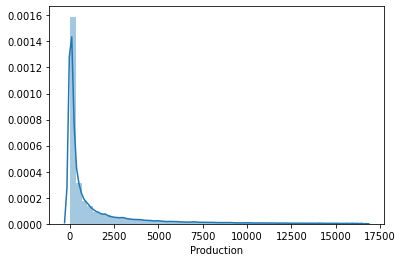

In [38]:
sns.distplot(df_encoded_1['Production'])

In [39]:
df_encoded_1['Production'] = df_encoded_1['Production'].apply(normalize)
df_encoded_1['Area']=df_encoded_1['Area'].apply(normalize_area)

In [40]:
df_encoded_1[['Production','Area']].describe()

,Production,Area
count,189751.000,189751.000
mean,0.089,0.106
std,0.166,0.184
min,0.000,0.000
25%,0.002,0.004
50%,0.017,0.023
75%,0.089,0.110
max,1.000,1.000


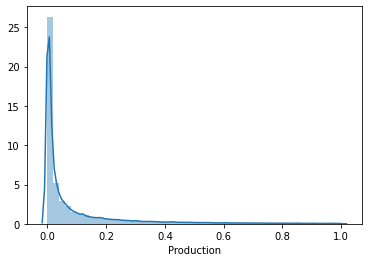

In [41]:
sns.distplot(df_encoded_1['Production'])

### SGD MODEL

In [42]:
from sklearn import linear_model

In [43]:
from sklearn.model_selection import train_test_split 

In [44]:
X=df_encoded_1[[ "State_Name_0","State_Name_1","State_Name_2","State_Name_3","State_Name_4","State_Name_5",
              "State_Name_6","State_Name_7","State_Name_8","State_Name_9","State_Name_10","State_Name_11",
              "State_Name_12","State_Name_13","State_Name_14","State_Name_15","State_Name_16","State_Name_17",
              "State_Name_18","State_Name_19","State_Name_20","State_Name_21","State_Name_22","State_Name_23",
              "State_Name_24","State_Name_25","State_Name_26","State_Name_27","State_Name_28","State_Name_29","State_Name_30",
              "Crop_0","Crop_1","Crop_2","Crop_3","Crop_4","Crop_5","Crop_6","Crop_7","Crop_8",
              "Crop_9","Crop_10","Crop_11","Crop_12","Crop_13","Crop_14","Crop_15","Crop_16",
              "Crop_17","Crop_18","Crop_19","Crop_20","Crop_21","Crop_22","Crop_23","Crop_24",
              "Crop_25","Crop_26","Crop_27","Crop_28","Crop_29","Crop_30","Crop_31","Crop_32",
              "Crop_33","Crop_34","Crop_35","Crop_36","Crop_37","Crop_38","Crop_39","Crop_40",
              "Crop_41","Crop_42","Crop_43","Crop_44","Crop_45","Crop_46","Crop_47","Crop_48",
              "Crop_49","Crop_50","Crop_51","Crop_52","Crop_53","Crop_54","Crop_55","Crop_56",
              "Crop_57","Crop_58","Crop_59","Crop_60","Crop_61","Crop_62","Crop_63","Crop_64",
              "Crop_65","Crop_66","Crop_67","Crop_68","Crop_69","Crop_70","Crop_71","Crop_72",
              "Crop_73","Crop_74","Crop_75","Crop_76","Crop_77","Crop_78","Crop_79","Crop_80",
              "Crop_81","Crop_82","Crop_83","Crop_84","Crop_85","Crop_86","Crop_87","Crop_88",
              "Crop_89","Crop_90","Crop_91","Crop_92","Crop_93","Crop_94","Crop_95","Crop_96",
              "Crop_97","Crop_98","Crop_99","Crop_100","Crop_101","Crop_102","Crop_103","Crop_104",
              "Crop_105","Crop_106","Crop_107","Crop_108","Crop_109","Crop_110","Crop_111","Crop_112",
              "Crop_113","Crop_114",'Crop_Year','Avg_Temp', 'Avg_Rain', 'Area',]].values


df_encoded.Prod_1000000 = df_encoded.Prod_1000000.astype(int) 


y=df_encoded_1[['Production']].values

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.30)

In [46]:
clf_sgd=linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42)

In [47]:
clf_sgd.fit(X_train,y_train.ravel())

SGDRegressor(penalty=None, random_state=42)

In [48]:
y_pred=clf_sgd.predict(X_test)

In [49]:
y_pred

array([3.81986112e+14, 3.82374520e+14, 3.53638587e+14, ...,
       3.81149339e+14, 3.82471809e+14, 3.65932533e+14])

In [50]:
y_pred_test=y_pred


In [51]:
y_pred_test=y_pred_test/100000000000000000

In [52]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred) 
print('r2 score for model is', r2)

r2 score for model is -5.0244738955405834e+30


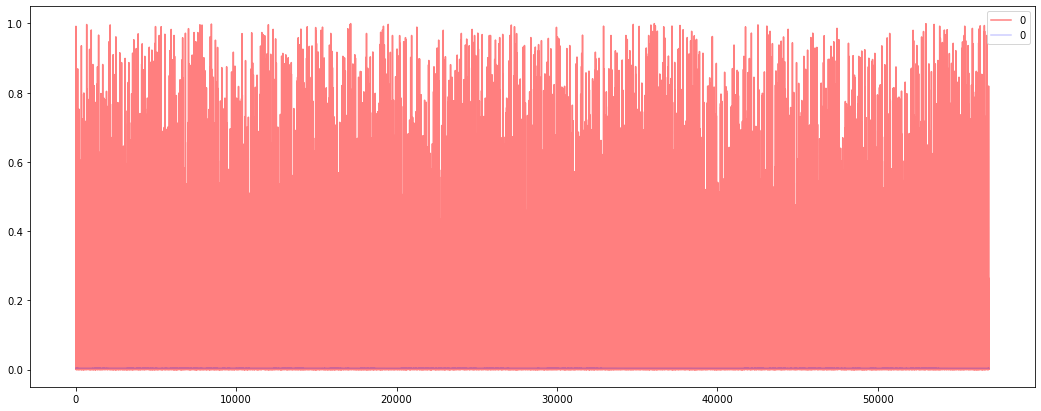

In [53]:
ax = plt.gca()
#plt.plot(y_test,ax=ax)
pd.DataFrame(y_test).plot(kind='line',color='red',ax=ax,alpha=0.5,figsize=(18,7))
pd.DataFrame(y_pred_test).plot(kind='line',color='Blue',ax=ax,alpha=0.2,figsize=(18,7))


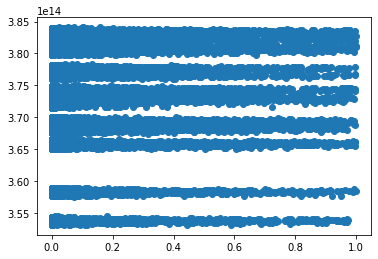

In [54]:
plt.scatter(y_test,y_pred)

#### Ridge Regression

In [55]:
from sklearn.linear_model import Ridge

In [56]:
rdg = Ridge(alpha = 0.1,fit_intercept=True,normalize=True)

In [57]:
rdg.fit(X,y)

Ridge(alpha=0.1, normalize=True)

In [58]:
import pickle
pickle.dump(rdg, open('rdg_model.pkl', 'wb'))

In [59]:
rdg.score(X,y)

0.542820909187302

In [60]:
y_pred=rdg.predict(X_test)

In [61]:
y_pred

array([[ 0.1021564 ],
       [ 0.07556768],
       [ 0.06833553],
       ...,
       [-0.01053315],
       [-0.00425394],
       [-0.02244594]])

u_input=X[1]

In [74]:
data={"State_Name_0":0,
      "State_Name_1":0,"State_Name_2":1,"State_Name_3":0,"State_Name_4":0,"State_Name_5":0,"State_Name_6":0,"State_Name_7":0,"State_Name_8":0,
      "State_Name_9":0,"State_Name_10":0,"State_Name_11":0,"State_Name_12":0,"State_Name_13":0,"State_Name_14":0,"State_Name_15":0,
      "State_Name_16":0,"State_Name_17":0,"State_Name_18":0,"State_Name_19":0,"State_Name_20":0,"State_Name_21":0,"State_Name_22":0,"State_Name_23":0,
      "State_Name_24":0,"State_Name_25":0,"State_Name_26":0,"State_Name_27":0,"State_Name_28":0,"State_Name_29":0,"State_Name_30":0,
      "Crop_0":0,"Crop_1":0,"Crop_2":0,"Crop_3":0,"Crop_4":0,"Crop_5":0,"Crop_6":0,"Crop_7":0,"Crop_8":0,
      "Crop_9":0,"Crop_10":0,"Crop_11":1,"Crop_12":0,"Crop_13":0,"Crop_14":0,"Crop_15":0,"Crop_16":0,
      "Crop_17":0,"Crop_18":0,"Crop_19":0,"Crop_20":0,"Crop_21":0,"Crop_22":0,"Crop_23":0,"Crop_24":0,
      "Crop_25":0,"Crop_26":0,"Crop_27":0,"Crop_28":0,"Crop_29":0,"Crop_30":0,"Crop_31":0,"Crop_32":0,
      "Crop_33":0,"Crop_34":0,"Crop_35":0,"Crop_36":0,"Crop_37":0,"Crop_38":0,"Crop_39":0,"Crop_40":0,
      "Crop_41":0,"Crop_42":0,"Crop_43":0,"Crop_44":0,"Crop_45":0,"Crop_46":0,"Crop_47":0,"Crop_48":0,
      "Crop_49":0,"Crop_50":0,"Crop_51":0,"Crop_52":0,"Crop_53":0,"Crop_54":0,"Crop_55":0,"Crop_56":0,
      "Crop_57":0,"Crop_58":0,"Crop_59":0,"Crop_60":0,"Crop_61":0,"Crop_62":0,"Crop_63":0,"Crop_64":0,
      "Crop_65":0,"Crop_66":0,"Crop_67":0,"Crop_68":0,"Crop_69":0,"Crop_70":0,"Crop_71":0,"Crop_72":0,
      "Crop_73":0,"Crop_74":0,"Crop_75":0,"Crop_76":0,"Crop_77":0,"Crop_78":0,"Crop_79":0,"Crop_80":0,
      "Crop_81":0,"Crop_82":0,"Crop_83":0,"Crop_84":0,"Crop_85":0,"Crop_86":0,"Crop_87":0,"Crop_88":0,
      "Crop_89":0,"Crop_90":0,"Crop_91":0,"Crop_92":0,"Crop_93":0,"Crop_94":0,"Crop_95":0,"Crop_96":0,
      "Crop_97":0,"Crop_98":0,"Crop_99":0,"Crop_100":0,"Crop_101":0,"Crop_102":0,"Crop_103":0,"Crop_104":0,
      "Crop_105":0,"Crop_106":0,"Crop_107":0,"Crop_108":0,"Crop_109":0,"Crop_110":0,"Crop_111":0,"Crop_112":0,
      "Crop_113":0,"Crop_114":0,'Crop_Year':2009,'Avg_Temp':24.0, 'Avg_Rain':1098, 'Area':4932}

features=pd.DataFrame(data,index=[0])

state_code={"State_Name_0":1,"State_Name_1":2,"State_Name_2":3,"State_Name_3":4,"State_Name_4":5,"State_Name_5":6,"State_Name_6":7,
"State_Name_7":8,"State_Name_8":9,"State_Name_9":10,"State_Name_10":11,"State_Name_11":12,"State_Name_12":13,"State_Name_13":14,
"State_Name_14":15,"State_Name_15":16,"State_Name_16":17,"State_Name_17":18,"State_Name_18":19,"State_Name_19":20,"State_Name_20":21,
"State_Name_21":22,"State_Name_22":23,"State_Name_23":24,"State_Name_24":25,"State_Name_25":26,"State_Name_26":27,"State_Name_27":28,
"State_Name_28":29,"State_Name_29":30,"State_Name_30":31}

crop_code={"Crop_0":1,"Crop_1":2,"Crop_2":3,"Crop_3":4,"Crop_4":5,"Crop_5":6,"Crop_6":7,"Crop_7":8,"Crop_8":9,
      "Crop_9":10,"Crop_10":11,"Crop_11":12,"Crop_12":13,"Crop_13":14,"Crop_14":15,"Crop_15":16,"Crop_16":17,
      "Crop_17":18,"Crop_18":19,"Crop_19":20,"Crop_20":21,"Crop_21":22,"Crop_22":23,"Crop_23":24,"Crop_24":25,
      "Crop_25":26,"Crop_26":27,"Crop_27":28,"Crop_28":29,"Crop_29":30,"Crop_30":31,"Crop_31":32,"Crop_32":33,
      "Crop_33":34,"Crop_34":35,"Crop_35":36,"Crop_36":37,"Crop_37":38,"Crop_38":39,"Crop_39":40,"Crop_40":41,
      "Crop_41":42,"Crop_42":43,"Crop_43":44,"Crop_44":45,"Crop_45":46,"Crop_46":47,"Crop_47":48,"Crop_48":49,
      "Crop_49":50,"Crop_50":51,"Crop_51":52,"Crop_52":53,"Crop_53":54,"Crop_54":55,"Crop_55":56,"Crop_56":57,
      "Crop_57":58,"Crop_58":59,"Crop_59":60,"Crop_60":61,"Crop_61":62,"Crop_62":63,"Crop_63":64,"Crop_64":65,
      "Crop_65":66,"Crop_66":67,"Crop_67":68,"Crop_68":69,"Crop_69":70,"Crop_70":71,"Crop_71":72,"Crop_72":73,
      "Crop_73":74,"Crop_74":75,"Crop_75":76,"Crop_76":77,"Crop_77":78,"Crop_78":79,"Crop_79":80,"Crop_80":81,
      "Crop_81":82,"Crop_82":83,"Crop_83":84,"Crop_84":85,"Crop_85":86,"Crop_86":87,"Crop_87":88,"Crop_88":89,
      "Crop_89":90,"Crop_90":91,"Crop_91":92,"Crop_92":93,"Crop_93":94,"Crop_94":95,"Crop_95":96,"Crop_96":97,
      "Crop_97":98,"Crop_98":99,"Crop_99":100,"Crop_100":101,"Crop_101":102,"Crop_102":103,"Crop_103":104,"Crop_104":105,
      "Crop_105":106,"Crop_106":107,"Crop_107":108,"Crop_108":109,"Crop_109":110,"Crop_110":111,"Crop_111":112,"Crop_112":113,
      "Crop_113":114,"Crop_114":115,'Crop_115':116,'Crop_116':117}

features_en=encoder.fit_transform(features)

features_en=encoder_state.fit_transform(features)

features


u_pred=rdg.predict(u_input.reshape(1,-1))

u_pred

y_

In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred) 
print('r2 score for model is', r2)

r2 score for model is 0.5443034515678657


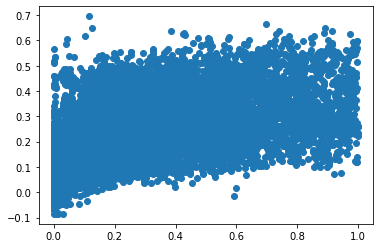

In [63]:
plt.scatter(y_test,y_pred)

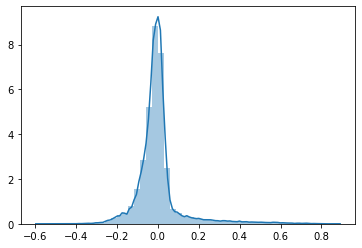

In [64]:
sns.distplot(y_test-y_pred)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(clf, X_train, y_train,cv=cv, n_jobs=-1)
    print('Cross Validation Score')
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [149]:
train_and_evaluate(rdg, X, y)

Coefficient of determination on training set: 0.542820909187302
Cross Validation Score
0.54 accuracy with a standard deviation of 0.01


### XGBoost

In [66]:
import xgboost as xgb
from xgboost import XGBRegressor

In [67]:
model=xgb.XGBRegressor()

In [68]:
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
import pickle
pickle.dump(model, open('xgb_model.pkl', 'wb'))

In [70]:
pred_xgb=model.predict(X_test)

In [76]:
u_pred=model.predict(features.reshape(1,-1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [71]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred_xgb) 
print('r2 score for model is', r2)

r2 score for model is 0.8654006392726872


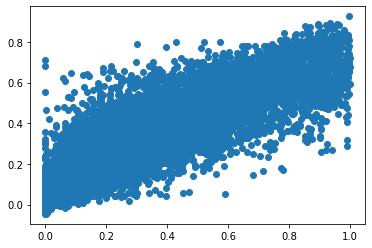

In [72]:
plt.scatter(y_test,pred_xgb)

In [73]:
#sns.distplot(y_test-pred_xgb)

In [158]:
train_and_evaluate(model,X_train,y_train)

Coefficient of determination on training set: 0.8665883575153579
Cross Validation Score
0.84 accuracy with a standard deviation of 0.01


### Gradient Boosting

In [159]:
#from sklearn.ensemble import GradientBoostingRegressor

In [160]:
#gbr_params = {'n_estimators': 1000,
 #         'max_depth': 3,
  #        'min_samples_split': 5,
   #       'learning_rate': 0.01,
    #      'loss': 'ls'}

In [161]:
#gbr.fit(X_train, y_train.ravel())